## Importing libraries & Reading the dataset

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import re

In [3]:
data= pd.read_csv('The-Office-Lines-V2.csv')
data.head()

,season,episode,title,scene,speaker,line
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So..."
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah."
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done."


In [4]:
data.shape

(54167, 6)

In [5]:
data.columns

Index(['season', 'episode', 'title', 'scene', 'speaker', 'line'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54167 entries, 0 to 54166
Data columns (total 6 columns):
season     54167 non-null int64
episode    54167 non-null int64
title      54167 non-null object
scene      54167 non-null int64
speaker    54167 non-null object
line       54167 non-null object
dtypes: int64(3), object(3)
memory usage: 2.5+ MB


#### Categorical variables : title, speaker, line
#### Numerical variables : season, episode, scene

## Categorical variable analysis

### Total number of episodes

In [7]:
print(data.title.unique())
data.title.value_counts()
print("Total number of episodes: {}".format(data.title.nunique()))

['Pilot' 'Diversity Day' 'Health Care' 'The Alliance' 'Basketball'
 'Hot Girl' 'The Dundies' 'Sexual Harassment' 'Office Olympics' 'The Fire'
 'Halloween' 'The Fight' 'The Client' 'Performance Review'
 'E-Mail Surveillance' 'Christmas Party' 'Booze Cruise' 'The Injury'
 'The Secret' 'The Carpet' 'Boys & Girls' "Valentine's Day"
 "Dwight's Speech" 'Take Your Daughter to Work Day' "Michael's Birthday"
 'Drug Testing' 'Conflict Resolution' 'Casino Night' 'Gay Witch Hunt'
 'The Convention' 'The Coup' 'Grief Counseling' 'Initiation' 'Diwali'
 'Branch Closing' 'The Merger' 'The Convict'
 'A Benihana Christmas (Parts 1&2)' 'Back from Vacation'
 'Traveling Salesmen' 'The Return' 'Ben Franklin' "Phyllis' Wedding"
 'Business School' 'Cocktails' 'The Negotiation' 'Safety Training'
 'Product Recall' "Women's Appreciation" 'Beach Games'
 'The Job (Parts 1&2)' 'Fun Run (Parts 1&2)'
 'Dunder Mifflin Infinity (Parts 1&2)' 'Launch Party (Parts 1&2)'
 'Money (Parts 1&2)' 'Local Ad' 'Branch Wars' 'Surviv

## Cast members appeared throughout the show

In [8]:
print(data.speaker.unique())
#print("Number of people apeared on the show: {}".format(len(data.speaker.value_counts())))
print("Number of people apeared on the show: {}".format(data.speaker.nunique()))

['Michael' 'Jim' 'Pam' 'Dwight' 'Jan' 'Michel' 'Todd Packer' 'Phyllis'
 'Stanley' 'Oscar' 'Angela' 'Kevin' 'Ryan' 'Man' 'Roy' 'Mr. Brown' 'Toby'
 'Kelly' 'Meredith' 'Travel Agent' 'Man on Phone' 'Everybody' 'Lonny'
 'Darryl' 'Teammates' 'Michael and Dwight' 'Warehouse worker' 'Madge'
 'Worker' 'Katy' 'Guy at bar' 'Other Guy at Bar' 'Guy At Bar'
 'Pam and Jim' 'Employee' "Chili's Employee" 'Warehouse Guy'
 'Warehouse guy' 'Man in Video' 'Video' 'Actor' 'Redheaded Actress'
 "Mr. O'Malley" 'Albiny' "Pam's Mom" 'Carol' 'Bill' 'Everyone' 'Crowd'
 'song' 'Song' 'Dwight and Michael' 'Sherri' 'Creed' 'Devon' 'Children'
 'Kid' 'Ira' "Ryan's Voicemail" 'Christian' 'Hostess'
 'Michael and Christian' 'Sadiq (IT guy)' 'Mark' 'Improv Teacher'
 'Mary-Beth' 'Girl acting Pregnant' 'Actress' 'Michael and Jim'
 'Kevin & Oscar' 'All' 'Liquor Store Clerk' 'JIm' 'Bob Vance'
 'Phyllis, Meredith, Michael, Kevin' 'Captain Jack' 'Brenda'
 'Darryl and Katy' 'Jim and Pam' 'Billy Merchant' 'Doctor' 'Lab Tech'
 'Da

## Checking for Null values

In [9]:
data.isnull()
#data.isnull().sum()

,season,episode,title,scene,speaker,line
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


## Number of episdoes per season 

In [10]:
dt=data.groupby(['season','episode'])
dt.first()

title  scene              speaker  \
season episode                                                               
1      1                                 Pilot      1              Michael   
       2                         Diversity Day     39              Michael   
       3                           Health Care     67              Michael   
       4                          The Alliance    105               Dwight   
       5                            Basketball    152              Michael   
       6                              Hot Girl    188                  Jan   
2      1                           The Dundies    223              Michael   
       2                     Sexual Harassment    279              Michael   
       3                       Office Olympics    323              Michael   
       4                              The Fire    371                  Pam   
       5                             Halloween    423              Michael   
       6                             The Fight    463               Dwight   
       7                            The Client    495                 Ryan   
       8                    Performance Review    538               Dwight   
       9                   E-Mail Surveillance    572              Michael   
       10                      Christmas Party    609               Dwight   
       11                         Booze Cruise    670                  Jim   
       12                           The Injury    707                Oscar   
       13                           The Secret    743                  Jim   
       14                           The Carpet    786                 Ryan   
       15                         Boys & Girls    841                  Jan   
       16                      Valentine's Day    892                  Pam   
       17                      Dwight's Speech    933              Michael   
       18       Take Your Daughter to Work Day    974                  Pam   
       19                   Michael's Birthday   1014              Michael   
       20                         Drug Testing   1053               Dwight   
       21                  Conflict Resolution   1091                Kevin   
       22                         Casino Night   1149              Michael   
3      1                        Gay Witch Hunt   1203                  Jim   
       2                        The Convention   1254              Michael   
...                                        ...    ...                  ...   
8      18                  Last Day In Florida   6657                 Andy   
       19                         Get The Girl   6696                  Pam   
       20                        Welcome Party   6736                  Pam   
       21                           Angry Andy   6760              Phyllis   
       22                           Fundraiser   6810                 Ryan   
       23                             Turf War   6847                 Gabe   
       24          Free Family Portrait Studio   6882                Oscar   
9      1                          The New Guys   6925                 Erin   
       2                         Roy's Wedding   6981                  Pam   
       3                       Andy's Ancestry   7027             Fake Jim   
       4                              Work Bus   7074                 Andy   
       5                     Here Comes Treble   7074               Dwight   
       6                              The Boat   7112                Oscar   
       7                             The Whale   7159                 Andy   
       8                            The Target   7197                Oscar   
       9                      Dwight Christmas   7232                  Jim   
       10                                 Lice   7271                Kevin   
       11                       Suit Warehouse   7322  New Instant Message   
       12                     Customer Loyalty   7357          

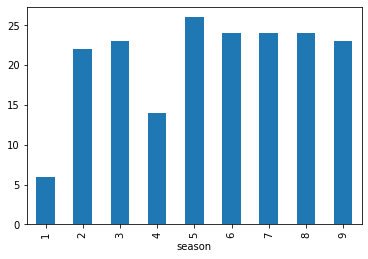

In [11]:
data.groupby('season')['episode'].nunique().plot(kind='bar')

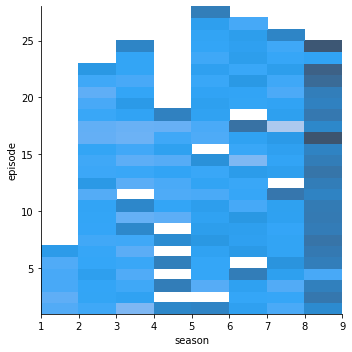

In [12]:
sb.displot(data=data, x=data.season,y=data.episode,binwidth=1)


## Scenes shared by speakers

In [13]:
df=data.groupby(['scene','speaker'])
df.first()

season  episode   title  \
scene speaker                                
1     Jim               1        1   Pilot   
      Michael           1        1   Pilot   
2     Michael           1        1   Pilot   
3     Michael           1        1   Pilot   
      Pam               1        1   Pilot   
4     Michael           1        1   Pilot   
5     Dwight            1        1   Pilot   
6     Jim               1        1   Pilot   
7     Dwight            1        1   Pilot   
      Jim               1        1   Pilot   
      Michael           1        1   Pilot   
8     Jan               1        1   Pilot   
9     Michael           1        1   Pilot   
10    Jan               1        1   Pilot   
      Michael           1        1   Pilot   
      Pam               1        1   Pilot   
11    Jan               1        1   Pilot   
      Michael           1        1   Pilot   
      Michel            1        1   Pilot   
      Todd Packer       1        1   Pilot   
12    Phyllis           1        1   Pilot   
      Stanley           1        1   Pilot   
13    Oscar             1        1   Pilot   
14    Angela            1        1   Pilot   
      Kevin             1        1   Pilot   
15    Jim               1        1   Pilot   
      Pam               1        1   Pilot   
16    Michael           1        1   Pilot   
17    Michael           1        1   Pilot   
      Pam               1        1   Pilot   
...                   ...      ...     ...   
7957  Pam               9       24  Finale   
7958  Andy              9       24  Finale   
      Darryl            9       24  Finale   
      Kevin             9       24  Finale   
7959  Dwight            9       24  Finale   
      Jim               9       24  Finale   
      Pam               9       24  Finale   
7960  Dwight            9       24  Finale   
7961  Andy              9       24  Finale   
      Darryl            9       24  Finale   
      Kevin             9       24  Finale   
7962  Andy              9       24  Finale   
7963  Oscar             9       24  Finale   
7964  Creed             9       24  Finale   
7965  Creed             9       24  Finale   
7966  Jim               9       24  Finale   
7967  Angela            9       24  Finale   
      Creed             9       24  Finale   
      Jim               9       24  Finale   
      Phyllis           9       24  Finale   
7968  Kevin             9       24  Finale   
      Oscar             9       24  Finale   
7969  Creed             9       24  Finale   
7970  Erin              9       24  Finale   
7971  Darryl            9       24  Finale   
7972  Creed             9       24  Finale   
7973  Meredith          9       24  Finale   
7974  Phyllis           9       24  Finale   
7975  Jim               9       24  Finale   
7976  Pam               9       24  Finale   

                                                                line  
scene speaker                                                         
1     Jim                 Oh, I told you. I couldn't close it. So...  
      Michael      All right Jim. Your quarterlies look very good...  
2     Michael       Yes, I'd like to speak to your office manager...  
3     Michael      I've, uh, I've been at Dunder Mifflin for 12 y...  
      Pam                                        Well. I don't know.  
4     Michael      People say I am the best boss. They go, "God w...  
5     Dwight        Shall I play for you? Pa rum pump um pum  I h...  
6     Jim          My job is to speak to clients on the phone abo...  
7     Dwight                                                Whassup!  
      Jim              Whassup! I still love that after seven years.  
      Michael                                               Whassup!  
8     Jan                    Just before lunch. That would be great.  
9     Michael      Corporate really doesn't really interfere with...  
10    Jan          Alright, was there anything you want

## Number of scenes per episode

In [14]:
dt=data.groupby(['season','episode'])['scene'].nunique()
dt


season  episode
1       1           39
        2           29
        3           38
        4           48
        5           37
        6           36
2       1           56
        2           44
        3           48
        4           53
        5           41
        6           33
        7           44
        8           35
        9           38
        10          62
        11          38
        12          37
        13          43
        14          54
        15          52
        16          42
        17          42
        18          41
        19          38
        20          38
        21          59
        22          53
3       1           50
        2           43
                  ... 
8       18          40
        19          41
        20          25
        21          51
        22          38
        23          36
        24          44
9       1           56
        2           47
        3           48
        4            1
        5         

## Season wise distribution of scenes per episode

In [15]:
df_scenes = data.sort_values(['season','episode','scene']).drop_duplicates(['season','episode','scene'],keep='first')
df_scenes

,season,episode,title,scene,speaker,line
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...
5,1,1,Pilot,2,Michael,"Yes, I'd like to speak to your office manager..."
6,1,1,Pilot,3,Michael,"I've, uh, I've been at Dunder Mifflin for 12 y..."
15,1,1,Pilot,4,Michael,"People say I am the best boss. They go, ""God w..."
16,1,1,Pilot,5,Dwight,Shall I play for you? Pa rum pump um pum I h...
17,1,1,Pilot,6,Jim,My job is to speak to clients on the phone abo...
18,1,1,Pilot,7,Michael,Whassup!
29,1,1,Pilot,8,Jan,Just before lunch. That would be great.
30,1,1,Pilot,9,Michael,Corporate really doesn't really interfere with...
31,1,1,Pilot,10,Jan,"Alright, was there anything you wanted to add ..."


In [16]:
data_table=df_scenes.pivot_table(index='season',columns='episode',values='scene',aggfunc='count')
data_table

episode,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
season,,,,,,,,,,,,,,,,,,,,,
1,39.0,29.0,38.0,48.0,37.0,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,56.0,44.0,48.0,53.0,41.0,33.0,44.0,35.0,38.0,62.0,...,38.0,38.0,59.0,53.0,NaN,NaN,NaN,NaN,NaN,NaN
3,50.0,43.0,56.0,35.0,43.0,45.0,51.0,61.0,32.0,72.0,...,54.0,38.0,45.0,41.0,55.0,76.0,NaN,NaN,NaN,NaN
4,75.0,NaN,65.0,NaN,72.0,NaN,83.0,NaN,41.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,95.0,NaN,21.0,40.0,43.0,42.0,36.0,36.0,29.0,30.0,...,32.0,34.0,45.0,40.0,39.0,41.0,31.0,35.0,45.0,41.0
6,31.0,34.0,29.0,78.0,NaN,32.0,30.0,39.0,44.0,51.0,...,45.0,35.0,52.0,37.0,50.0,42.0,42.0,44.0,NaN,NaN
7,37.0,42.0,42.0,36.0,35.0,53.0,48.0,42.0,37.0,35.0,...,39.0,35.0,29.0,50.0,39.0,32.0,80.0,NaN,NaN,NaN
8,45.0,33.0,36.0,49.0,49.0,44.0,36.0,36.0,37.0,42.0,...,41.0,25.0,51.0,38.0,36.0,44.0,NaN,NaN,NaN,NaN
9,56.0,47.0,48.0,1.0,39.0,47.0,39.0,36.0,40.0,52.0,...,48.0,46.0,53.0,70.0,NaN,115.0,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Scenes')

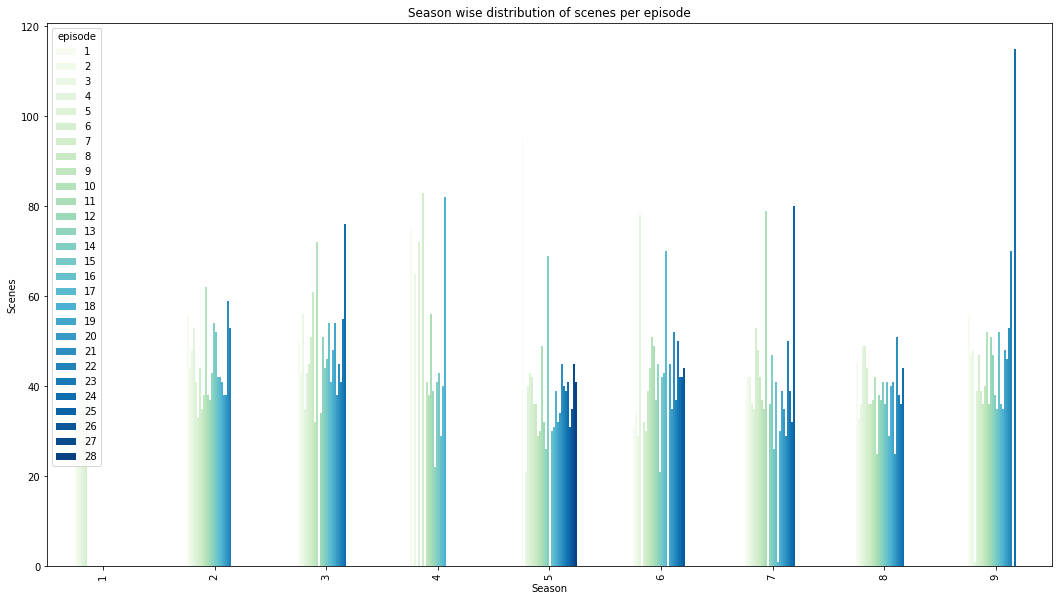

In [17]:
data_table.plot(kind='bar',figsize=(18,10),title='Season wise distribution of scenes per episode',cmap='GnBu')
plt.xlabel('Season')
plt.ylabel('Scenes')


## Number of lines per Season

In [18]:
data.groupby('season')['line'].count()

season
1    1487
2    5835
3    6291
4    4734
5    7684
6    7588
7    7169
8    6655
9    6724
Name: line, dtype: int64

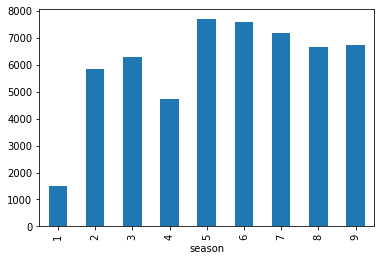

In [19]:
data.groupby('season')['line'].count().plot(kind='bar')

## Number of lines per episode

def lines_per_ep(data):
    dt=data.groupby(['season','episode'])['line'].count()
    return dt
data.assign(Lines_per_episode= lambda x: lines_per_ep(x))
    
    

data.groupby(['season','episode'])['line'].count()
data.assign(Lines_per_episode= lambda x: x.groupby(['season','episode'])['line'].count())

def lines_per_ep(data):
    dt=data.groupby(['season','episode'])['line'].count()
    return dt
data.apply(lines_per_ep,axis=1)

In [20]:
ds=data.groupby(['season','episode'])['line'].count()
print(ds)
type(ds)
#dfs= ds.to_frame()
#type(dfs)
#dfs.rename(columns={'line': 'lines_per_ep'})

season  episode
1       1          228
        2          203
        3          243
        4          243
        5          230
        6          340
2       1          255
        2          278
        3          275
        4          316
        5          269
        6          267
        7          253
        8          272
        9          274
        10         282
        11         223
        12         356
        13         260
        14         255
        15         278
        16         194
        17         198
        18         261
        19         243
        20         205
        21         256
        22         365
3       1          134
        2          299
                  ... 
8       18         264
        19         258
        20         307
        21         292
        22         239
        23         288
        24         295
9       1          225
        2          296
        3          240
        4            2
        5         

pandas.core.series.Series

In [21]:
ds=data.groupby(['season','episode'])['line'].count().tolist()

In [22]:
#data.merge(ds)

In [23]:
#pd.concat([data,ds], axis=1)

## Plotting number of lines per episode using pivot table

In [24]:
p_table= data.pivot_table(index='season',columns='episode',values='line',aggfunc='count')
p_table

episode,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
season,,,,,,,,,,,,,,,,,,,,,
1,228.0,203.0,243.0,243.0,230.0,340.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,255.0,278.0,275.0,316.0,269.0,267.0,253.0,272.0,274.0,282.0,...,243.0,205.0,256.0,365.0,NaN,NaN,NaN,NaN,NaN,NaN
3,134.0,299.0,255.0,231.0,261.0,212.0,256.0,470.0,191.0,478.0,...,347.0,277.0,244.0,280.0,278.0,491.0,NaN,NaN,NaN,NaN
4,480.0,NaN,549.0,NaN,536.0,NaN,449.0,NaN,206.0,276.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,499.0,NaN,219.0,270.0,268.0,295.0,366.0,324.0,298.0,322.0,...,311.0,290.0,264.0,308.0,256.0,276.0,286.0,319.0,273.0,270.0
6,309.0,268.0,302.0,551.0,NaN,352.0,309.0,319.0,367.0,247.0,...,278.0,281.0,359.0,263.0,326.0,308.0,326.0,245.0,NaN,NaN
7,239.0,266.0,228.0,313.0,390.0,284.0,286.0,271.0,302.0,305.0,...,290.0,236.0,257.0,325.0,265.0,255.0,493.0,NaN,NaN,NaN
8,226.0,290.0,288.0,241.0,263.0,293.0,321.0,238.0,278.0,310.0,...,258.0,307.0,292.0,239.0,288.0,295.0,NaN,NaN,NaN,NaN
9,225.0,296.0,240.0,2.0,276.0,281.0,288.0,315.0,287.0,253.0,...,260.0,233.0,382.0,501.0,NaN,516.0,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Episode')

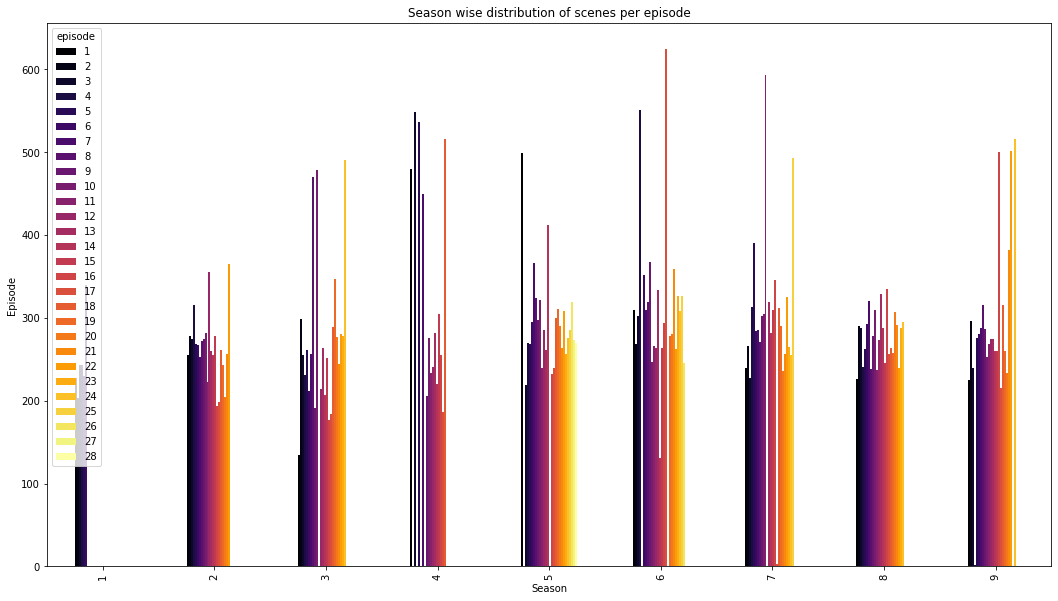

In [25]:
p_table.plot(kind='bar',figsize=(18,10),title='Season wise distribution of scenes per episode',cmap='inferno')
plt.xlabel('Season')
plt.ylabel('Episode')

In [26]:
data.groupby(['season','episode'])['line'].count()

season  episode
1       1          228
        2          203
        3          243
        4          243
        5          230
        6          340
2       1          255
        2          278
        3          275
        4          316
        5          269
        6          267
        7          253
        8          272
        9          274
        10         282
        11         223
        12         356
        13         260
        14         255
        15         278
        16         194
        17         198
        18         261
        19         243
        20         205
        21         256
        22         365
3       1          134
        2          299
                  ... 
8       18         264
        19         258
        20         307
        21         292
        22         239
        23         288
        24         295
9       1          225
        2          296
        3          240
        4            2
        5         

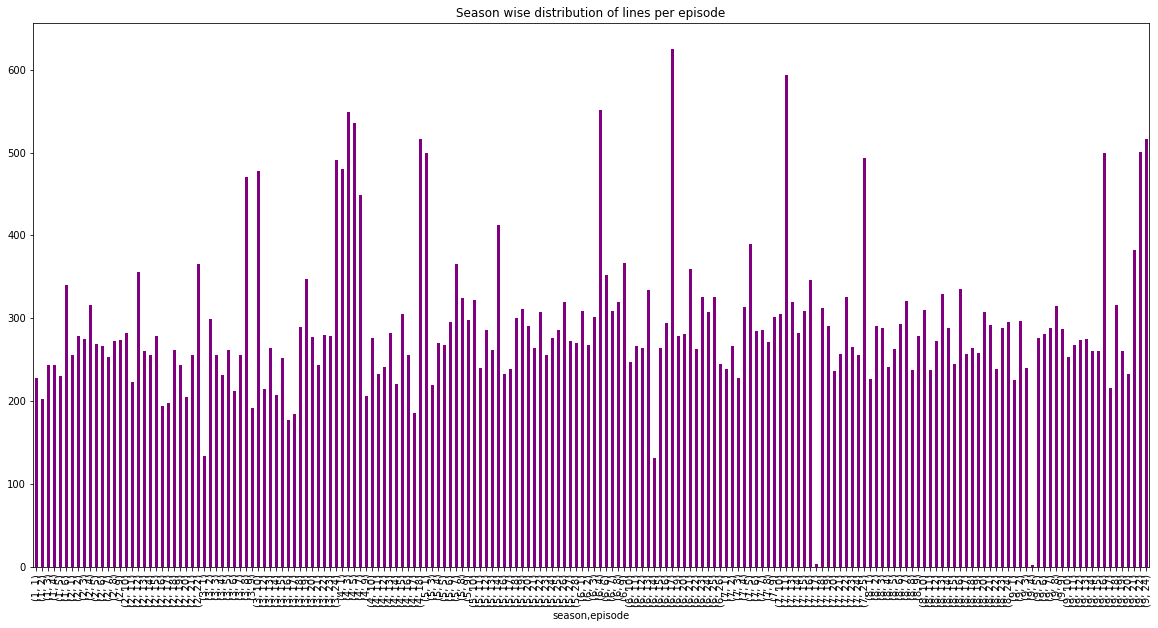

In [27]:
plt.figure(figsize=(20,10))
data.groupby(['season','episode'])['line'].count().plot(kind='bar',title='Season wise distribution of lines per episode',color='Purple')

## Number of lines per character

In [28]:
data.speaker.value_counts()

Michael                     10712
Dwight                       6707
Jim                          6156
Pam                          4933
Andy                         3658
Angela                       1529
Kevin                        1516
Erin                         1401
Oscar                        1320
Ryan                         1181
Darryl                       1149
Phyllis                       957
Kelly                         821
Toby                          812
Jan                           802
Stanley                       661
Meredith                      549
Holly                         540
Nellie                        500
Gabe                          426
Robert                        406
Creed                         390
David                         380
Karen                         321
Clark                         246
Charles                       221
Roy                           218
Pete                          210
Jo                            189
Deangelo      

## Season wise lines per speaker

In [29]:
data.groupby('season')['speaker'].value_counts()

season  speaker              
1       Michael                  489
        Jim                      228
        Dwight                   208
        Pam                      162
        Katy                      58
        Oscar                     42
        Jan                       38
        Ryan                      37
        Mr. Brown                 36
        Roy                       34
        Stanley                   24
        Angela                    23
        Kevin                     23
        Darryl                    15
        Meredith                  13
        Toby                      12
        Phyllis                   11
        Everybody                  6
        Lonny                      5
        Worker                     5
        Madge                      3
        Man on Phone               3
        Todd Packer                3
        Kelly                      2
        Warehouse worker           2
        Man                        1
        

## Top 20 characters on the show based on number of lines spoken

In [30]:
data.speaker.value_counts().sort_values(ascending=False).iloc[:20]


Michael     10712
Dwight       6707
Jim          6156
Pam          4933
Andy         3658
Angela       1529
Kevin        1516
Erin         1401
Oscar        1320
Ryan         1181
Darryl       1149
Phyllis       957
Kelly         821
Toby          812
Jan           802
Stanley       661
Meredith      549
Holly         540
Nellie        500
Gabe          426
Name: speaker, dtype: int64

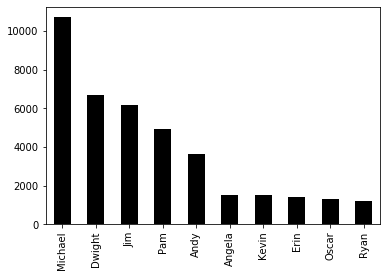

In [31]:
data.speaker.value_counts().sort_values(ascending=False).iloc[:10].plot(kind='bar',color='Black')

### Total speakers per season

In [32]:
data.groupby('season')['speaker'].nunique()

season
1     30
2    119
3    109
4    110
5    141
6    169
7    158
8    128
9    187
Name: speaker, dtype: int64

## Number of speakers per scene, episode wise

In [33]:
data.groupby(['episode','scene'])['speaker'].unique()

episode  scene
1        1                                           [Michael, Jim]
         2                                                [Michael]
         3                                           [Michael, Pam]
         4                                                [Michael]
         5                                                 [Dwight]
         6                                                    [Jim]
         7                                   [Michael, Jim, Dwight]
         8                                                    [Jan]
         9                                                [Michael]
         10                                     [Jan, Michael, Pam]
         11                     [Michael, Jan, Michel, Todd Packer]
         12                                      [Phyllis, Stanley]
         13                                                 [Oscar]
         14                                         [Angela, Kevin]
         15                      

## Number of times "That's what she said" reference was made

#### 34 times overall and out of that 23 times by Micheal

In [34]:
dt=data['line'].str.contains("That's what she said", na=False, case=False)
michaelcatch=data[dt]
michaelcatch


,season,episode,title,scene,speaker,line
1885,2,2,Sexual Harassment,302,Michael,That's what she said. Pam?
1931,2,2,Sexual Harassment,312,Jim,Does that include 'That's What She Said'?
1934,2,2,Sexual Harassment,312,Michael,THAT'S WHAT SHE SAID!
3965,2,10,Christmas Party,610,Michael,"A, that's what she said, and B, I wanted it to..."
4777,2,12,The Injury,739,Dwight,That's what she said.
5825,2,17,Dwight's Speech,938,Michael,That's what she said!
6799,2,21,Conflict Resolution,1112,Michael,"That's what she said. The thing is, Angela......"
7450,3,1,Gay Witch Hunt,1250,Michael,I am glad that today spurred social change. Th...
9996,3,10,A Benihana Christmas (Parts 1&2),1662,Michael,Oh. That's what she said.
10563,3,13,Traveling Salesmen,1763,Dwight,That's what she said.


In [35]:
len(michaelcatch)


34

In [36]:
michaelcatch[michaelcatch['speaker'].isin(['Michael'])]

,season,episode,title,scene,speaker,line
1885,2,2,Sexual Harassment,302,Michael,That's what she said. Pam?
1934,2,2,Sexual Harassment,312,Michael,THAT'S WHAT SHE SAID!
3965,2,10,Christmas Party,610,Michael,"A, that's what she said, and B, I wanted it to..."
5825,2,17,Dwight's Speech,938,Michael,That's what she said!
6799,2,21,Conflict Resolution,1112,Michael,"That's what she said. The thing is, Angela......"
7450,3,1,Gay Witch Hunt,1250,Michael,I am glad that today spurred social change. Th...
9996,3,10,A Benihana Christmas (Parts 1&2),1662,Michael,Oh. That's what she said.
11448,3,18,Cocktails,1964,Michael,That's what she said.
12362,3,21,Product Recall,2106,Michael,"No, no. I need two men on this. That's what sh..."
14131,4,3,Dunder Mifflin Infinity (Parts 1&2),2394,Michael,Hey. Can you make that straighter? That's what...


In [37]:
len(michaelcatch[michaelcatch['speaker'].isin(['Michael'])])

23

## Number of times Dwight mentions beets

In [38]:
da=data['line'].str.contains("beet",na=False,case=False)
beets=data[da]
beets=beets[beets['speaker'].isin(['Dwight'])]
print(len(beets))
beets.head()

23


,season,episode,title,scene,speaker,line
2124,2,3,Office Olympics,337,Dwight,"Actually, I do own property. My grandfather le..."
2249,2,3,Office Olympics,364,Dwight,You know you can always refinance your mortgag...
2251,2,3,Office Olympics,364,Dwight,People love beets.
2253,2,3,Office Olympics,364,Dwight,Everybody loves beets.
2396,2,4,The Fire,393,Dwight,"...hollowed out, inside: waterproof matches, i..."


## Number of times Andy mentions Cornell

In [39]:
df=data['line'].str.contains("Cornell", na=False, case=False)
andy_cornell= data[df]
andy_cornell=andy_cornell[andy_cornell['speaker'].isin(['Andy'])]
print(len(andy_cornell))
andy_cornell.head()

26


,season,episode,title,scene,speaker,line
7355,3,1,Gay Witch Hunt,1215,Andy,"Big Tuna is a super ambitious guy, you know? C..."
9516,3,9,The Convict,1594,Andy,I started the main Frisbee golf club at Cornel...
10734,3,14,The Return,1806,Andy,"Just listen, I forgot to tell you the plan for..."
12040,3,19,The Negotiation,2056,Andy,I graduated from anger management the same way...
13350,3,24,The Job (Parts 1&2),2274,Andy,"The capital of Maine is Montpelier, Vermont, w..."


## Data Cleaning

### Removing duplicates and spelling errors in names

In [40]:
data.speaker.unique()

array(['Michael', 'Jim', 'Pam', 'Dwight', 'Jan', 'Michel', 'Todd Packer',
       'Phyllis', 'Stanley', 'Oscar', 'Angela', 'Kevin', 'Ryan', 'Man',
       'Roy', 'Mr. Brown', 'Toby', 'Kelly', 'Meredith', 'Travel Agent',
       'Man on Phone', 'Everybody', 'Lonny', 'Darryl', 'Teammates',
       'Michael and Dwight', 'Warehouse worker', 'Madge', 'Worker',
       'Katy', 'Guy at bar', 'Other Guy at Bar', 'Guy At Bar',
       'Pam and Jim', 'Employee', "Chili's Employee", 'Warehouse Guy',
       'Warehouse guy', 'Man in Video', 'Video', 'Actor',
       'Redheaded Actress', "Mr. O'Malley", 'Albiny', "Pam's Mom",
       'Carol', 'Bill', 'Everyone', 'Crowd', 'song', 'Song',
       'Dwight and Michael', 'Sherri', 'Creed', 'Devon', 'Children',
       'Kid', 'Ira', "Ryan's Voicemail", 'Christian', 'Hostess',
       'Michael and Christian', 'Sadiq (IT guy)', 'Mark',
       'Improv Teacher', 'Mary-Beth', 'Girl acting Pregnant', 'Actress',
       'Michael and Jim', 'Kevin & Oscar', 'All', 'Liquor Sto

Anglea ,Angela:,Angel,Angels
M ichael,Michael,MIchael,Michae,Michael [on phone],Warehouse Michael,Michal,Miichael,Mihael
Cousin Mose,Mose
Dwight:,Dwight.
Jan [on phone]
Phil Maguire,Phil

David Wallcve,Dacvid Walalce,Dacvid Wallace,David Wallcve
A.J. ,AJ
Vance Refrigeration Guy 1','Vance Refrigeration Guy 2', 'VRG 1', 'VRG 2'
Mema,Mee-Maw,MeeMaw
Pam's mom,Helene,(Pam's mom) Heleen
Jo Bennett,Jo
Carroll,Carrol,Carol Stills,Carol
Deangelo,DeAngelo,Denagelo,DeAgnelo
Holy,Holly
'Bob', 'Bob Vance', 'Bob Vance, Vance Refrigeration'
'Pam ', 'Pam [on phone]', 'Pam as fourth-biggest client', 'Pam as ninth-biggest client'

In [41]:
data[data['speaker'].isin(['Angel','Angels','Anglea'])]

,season,episode,title,scene,speaker,line
6825,2,21,Conflict Resolution,1115,Anglea,I didn't do it!
14937,4,5,Launch Party (Parts 1&2),2499,Angels,Okay. Okay.
33995,7,2,Counseling,5126,Angel,Please and thank you go a long way.


In [42]:
data[data['speaker'].isin(['Dight','Dwight [on phone]', 'Dwight.', 'Dwight:', 'DwightKSchrute'])]

,season,episode,title,scene,speaker,line
8956,3,7,Branch Closing,1522,Dwight:,"Stranford is closed! Michael, we're not closed..."
14746,4,5,Launch Party (Parts 1&2),2475,DwightKSchrute,You tell me.
14749,4,5,Launch Party (Parts 1&2),2475,DwightKSchrute,How do I know this isn't Jim?
14809,4,5,Launch Party (Parts 1&2),2481,DwightKSchrute,Here's a suggestion computer. I assume you re...
18900,5,3,Business Ethics,3141,Dight,Michael.
32185,6,22,Secretary's Day,4861,Dwight.,"Hello, Pam."
40051,7,24,"Dwight K. Schrute, (Acting) Manager",5911,Dwight [on phone],Mose... you'll never guess where I am right now.


In [43]:
data['speaker'].replace(['Angel','Angels','Anglea'], "Angela", inplace=True)
data['speaker'].replace(['Dight','Dwight [on phone]', 'Dwight.', 'Dwight:', 'DwightKSchrute'], "Dwight", inplace=True)
data['speaker'].replace(['Carroll','Carrol','Carol Stills','Carol'], "Carol", inplace=True)
data['speaker'].replace(['Angel','Angels','Anglea'], "Angela", inplace=True)
data['speaker'].replace(['M ichael','Michael','MIchael','Michae','Michael [on phone]','Warehouse Michael','Michal','Miichael','Mihael','Micheal'], "Michael", inplace=True)
data['speaker'].replace(['David Wallcve','Dacvid Walalce','Dacvid Wallace','David Wallcve','David'], "David Wallace", inplace=True)
data['speaker'].replace(['Mema','Mee-Maw','MeeMaw'], "Mee-Maw", inplace=True)
data['speaker'].replace(['Bob', 'Bob Vance', 'Bob Vance, Vance Refrigeration'], "Bob Vance", inplace=True)
data['speaker'].replace(['Pam', 'Pam [on phone]', 'Pam as fourth-biggest client', 'Pam as ninth-biggest client'], "Pam", inplace=True)
data['speaker'].replace(['Deangelo','DeAngelo','Denagelo','DeAgnelo'], "Deangelo", inplace=True)
data['speaker'].replace(['Holy','Holly'],"Holly",inplace=True)
data['speaker'].replace(['A.J.','AJ'],"AJ",inplace=True)
data['speaker'].replace(["(Pam's mom) Heleen","Pam's Mom",'Helen',"Pam's mom"], "Helene", inplace=True)
data['speaker'].replace(['Darrly', 'Darry', 'Daryl'], "Darryl", inplace=True)
data['speaker'].replace(['Phylis', 'Phyliss'], "Phyllis",inplace=True)
data['speaker'].replace(['Phil','Phil Maguire','Maguire'],"Phil Maguire",inplace=True)
data['speaker'].replace(['Cousin Mose', 'Mose [on phone]'],"Mose",inplace=True)
data['speaker'].replace(['Vance Refrigeration Guy 1','VRG 1'],"Vance Refrigeration Guy 1",inplace=True)
data['speaker'].replace(['Vance Refrigeration Guy 2','VRG 2'],"Vance Refrigeration Guy 2",inplace=True)
data['speaker'].replace(['Jo','Jo Bennett'],"Jo",inplace=True)
data['speaker'].replace(['Jan [on phone]'],"Jan",inplace=True)
data['speaker'].replace(['Cathy','Kathy'],"Cathy",inplace=True)
data['speaker'].replace(['Pete','Pete Halpert'],"Pete",inplace=True)


In [44]:
data[data['speaker'].isin(['Angel','Angels','Anglea'])]

,season,episode,title,scene,speaker,line


### Removing punctuations and contractions from dialogues

In [45]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [46]:
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would",  "i'd": "I would","I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have","i'm": "I am","i've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

In [47]:
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)


In [48]:
data['lower_lines']=data['line'].apply(lambda a: a.lower())
data['clean_lines']=data['lower_lines'].apply(lambda x:expand_contractions(x))
data.head()


,season,episode,title,scene,speaker,line,lower_lines,clean_lines
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...,all right jim. your quarterlies look very good...,all right jim. your quarterlies look very good...
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So...","oh, i told you. i couldn't close it. so...","oh, i told you. i could not close it. so..."
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...,so you've come to the master for guidance? is ...,so you have come to the master for guidance? i...
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah.","actually, you called me in here, but yeah.","actually, you called me in here, but yeah."
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done.","all right. well, let me show you how it's done.","all right. well, let me show you how it is done."


In [49]:
def remove_punctuations(text):
    nopunctuation="".join([i for i in text if i not in string.punctuation])
    return nopunctuation
data['clean_lines']= data['clean_lines'].apply(lambda x:remove_punctuations(x))
data['lower_lines']=data['clean_lines'].apply(lambda a: a.lower())
data.head()

,season,episode,title,scene,speaker,line,lower_lines,clean_lines
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...,all right jim your quarterlies look very good ...,all right jim your quarterlies look very good ...
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So...",oh i told you i could not close it so,oh i told you i could not close it so
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...,so you have come to the master for guidance is...,so you have come to the master for guidance is...
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah.",actually you called me in here but yeah,actually you called me in here but yeah
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done.",all right well let me show you how it is done,all right well let me show you how it is done


## WordClouds

In [50]:
#pip install wordcloud

### Episode titles wordcloud

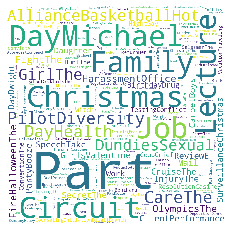

In [51]:
from wordcloud import WordCloud,ImageColorGenerator
text="".join(epi for epi in data.title.unique())
wordcloud=WordCloud(height=1000,width=1000,background_color='white').generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Episode lines wordcloud

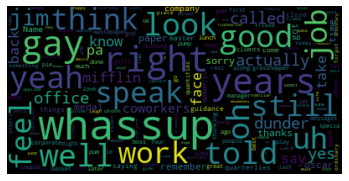

In [71]:
txt="".join(line for line in str(data.no_stopwords))
WC = WordCloud(max_font_size=50, background_color="Black").generate(txt)
plt.imshow(WC, interpolation = 'bilinear') 
plt.axis('off')
plt.show()

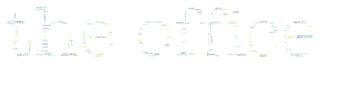

In [72]:
from PIL import Image
txt="".join(line for line in str(data.no_stopwords))
img = np.array(Image.open('office-tv-show-logo.png'))
WC = WordCloud(max_font_size=200, background_color="White",mask=img).generate(txt)
plt.imshow(WC, interpolation = 'bilinear')
plt.axis('off')
plt.show()

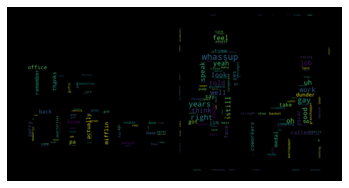

In [73]:
from PIL import Image
txt="".join(line for line in str(data.no_stopwords))
img = np.array(Image.open('the-office-logo-png-3.png'))
WC = WordCloud(max_font_size=300, background_color="Black",mask=img).generate(txt)
plt.imshow(WC, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Data Preprocessing

## Tokenizing 'line' column

In [ ]:
#pip install nltk

In [53]:
import re
def tokenization(text):
    tokens=re.findall("[\w']+", text)
    return tokens
data['msg_tokenized']= data['lower_lines'].apply(lambda x: tokenization(x))
data.head()
#data.drop('tokenized_lines',axis=1)

,season,episode,title,scene,speaker,line,lower_lines,clean_lines,msg_tokenized
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...,all right jim your quarterlies look very good ...,all right jim your quarterlies look very good ...,"[all, right, jim, your, quarterlies, look, ver..."
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So...",oh i told you i could not close it so,oh i told you i could not close it so,"[oh, i, told, you, i, could, not, close, it, so]"
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...,so you have come to the master for guidance is...,so you have come to the master for guidance is...,"[so, you, have, come, to, the, master, for, gu..."
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah.",actually you called me in here but yeah,actually you called me in here but yeah,"[actually, you, called, me, in, here, but, yeah]"
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done.",all right well let me show you how it is done,all right well let me show you how it is done,"[all, right, well, let, me, show, you, how, it..."


## Removing stopwords from tokenized lines

In [54]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:20]
#from nltk.corpus import stopwords
#set(stopwords.words('english'))

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [55]:
def remove_stopwords(text):
    nostop= [i for i in text if i not in stopwords]
    return nostop

In [56]:
data['no_stopwords']= data['msg_tokenized'].apply(lambda x:remove_stopwords(x))
data.head()

,season,episode,title,scene,speaker,line,lower_lines,clean_lines,msg_tokenized,no_stopwords
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...,all right jim your quarterlies look very good ...,all right jim your quarterlies look very good ...,"[all, right, jim, your, quarterlies, look, ver...","[right, jim, quarterlies, look, good, things, ..."
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So...",oh i told you i could not close it so,oh i told you i could not close it so,"[oh, i, told, you, i, could, not, close, it, so]","[oh, told, could, close]"
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...,so you have come to the master for guidance is...,so you have come to the master for guidance is...,"[so, you, have, come, to, the, master, for, gu...","[come, master, guidance, saying, grasshopper]"
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah.",actually you called me in here but yeah,actually you called me in here but yeah,"[actually, you, called, me, in, here, but, yeah]","[actually, called, yeah]"
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done.",all right well let me show you how it is done,all right well let me show you how it is done,"[all, right, well, let, me, show, you, how, it...","[right, well, let, show, done]"


## Stemming

In [57]:
from nltk.stem import PorterStemmer
word_stemmer=PorterStemmer()
def stemmed(text):
    stem_word=[word_stemmer.stem(word) for word in text]
    return stem_word

data['stemmed_lines']=data['no_stopwords'].apply(lambda x: stemmed(x))
data.head()
    

,season,episode,title,scene,speaker,line,lower_lines,clean_lines,msg_tokenized,no_stopwords,stemmed_lines
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...,all right jim your quarterlies look very good ...,all right jim your quarterlies look very good ...,"[all, right, jim, your, quarterlies, look, ver...","[right, jim, quarterlies, look, good, things, ...","[right, jim, quarterli, look, good, thing, lib..."
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So...",oh i told you i could not close it so,oh i told you i could not close it so,"[oh, i, told, you, i, could, not, close, it, so]","[oh, told, could, close]","[oh, told, could, close]"
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...,so you have come to the master for guidance is...,so you have come to the master for guidance is...,"[so, you, have, come, to, the, master, for, gu...","[come, master, guidance, saying, grasshopper]","[come, master, guidanc, say, grasshopp]"
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah.",actually you called me in here but yeah,actually you called me in here but yeah,"[actually, you, called, me, in, here, but, yeah]","[actually, called, yeah]","[actual, call, yeah]"
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done.",all right well let me show you how it is done,all right well let me show you how it is done,"[all, right, well, let, me, show, you, how, it...","[right, well, let, show, done]","[right, well, let, show, done]"


## Lemmatization

In [58]:
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')
word_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    lemm_word=[word_lemmatizer.lemmatize(word) for word in text]
    return lemm_word

data['lemmatized_lines']=data['no_stopwords'].apply(lambda x: lemmatizer(x))
data.head()

,season,episode,title,scene,speaker,line,lower_lines,clean_lines,msg_tokenized,no_stopwords,stemmed_lines,lemmatized_lines
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...,all right jim your quarterlies look very good ...,all right jim your quarterlies look very good ...,"[all, right, jim, your, quarterlies, look, ver...","[right, jim, quarterlies, look, good, things, ...","[right, jim, quarterli, look, good, thing, lib...","[right, jim, quarterly, look, good, thing, lib..."
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So...",oh i told you i could not close it so,oh i told you i could not close it so,"[oh, i, told, you, i, could, not, close, it, so]","[oh, told, could, close]","[oh, told, could, close]","[oh, told, could, close]"
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...,so you have come to the master for guidance is...,so you have come to the master for guidance is...,"[so, you, have, come, to, the, master, for, gu...","[come, master, guidance, saying, grasshopper]","[come, master, guidanc, say, grasshopp]","[come, master, guidance, saying, grasshopper]"
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah.",actually you called me in here but yeah,actually you called me in here but yeah,"[actually, you, called, me, in, here, but, yeah]","[actually, called, yeah]","[actual, call, yeah]","[actually, called, yeah]"
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done.",all right well let me show you how it is done,all right well let me show you how it is done,"[all, right, well, let, me, show, you, how, it...","[right, well, let, show, done]","[right, well, let, show, done]","[right, well, let, show, done]"


## Bag of Words 

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer(stop_words='english')
vectorizer.fit(data['lower_lines'])
vt=vectorizer.get_feature_names()
vt

['00',
 '00983126',
 '0175',
 '019',
 '05',
 '050',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '10001',
 '100k',
 '101',
 '1012',
 '102',
 '103',
 '1030',
 '105',
 '107',
 '107th',
 '109',
 '10am',
 '10th',
 '11',
 '1100th',
 '1115',
 '1120',
 '1123',
 '1130',
 '1138',
 '115',
 '117',
 '11th',
 '12',
 '120',
 '1200',
 '12000',
 '1201',
 '1220',
 '123',
 '1245',
 '125',
 '127',
 '128',
 '129',
 '1299',
 '12pack',
 '12th',
 '13',
 '132',
 '134',
 '13th',
 '14',
 '140',
 '142',
 '1434967',
 '147',
 '1490',
 '15',
 '150',
 '1500',
 '150000',
 '156',
 '16',
 '160',
 '1600',
 '1600acre',
 '165',
 '16641',
 '16bond',
 '17',
 '1752',
 '17th',
 '18',
 '180',
 '18000',
 '1808',
 '1816',
 '185',
 '18505',
 '1864',
 '1865',
 '1866',
 '1890',
 '19',
 '190',
 '1930',
 '1949',
 '1955',
 '1960',
 '1967',
 '1970',
 '1972',
 '1980',
 '1982',
 '1983',
 '1985',
 '199',
 '1992',
 '1995',
 '1996',
 '1999',
 '19th',
 '1st',
 '20',
 '200',
 '2000',
 '20000',
 '2001',
 '2002',
 '2004',
 '2005',
 '2006',
 '2

In [60]:
vector=vectorizer.transform(data['lower_lines'])
vector_space=vector.toarray()
vector_space

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## TF-IDF vectorizer

#### Dictionary of Number of occurences of words ( Term Frequency )

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfvectorizer = TfidfVectorizer(stop_words='english')
tfvectorizer.fit(data['lower_lines'])
tfvectorizer.vocabulary_


{'right': 14851,
 'jim': 9545,
 'quarterlies': 14044,
 'look': 10472,
 'good': 7607,
 'things': 17856,
 'library': 10253,
 'oh': 12231,
 'told': 18093,
 'close': 3583,
 'come': 3764,
 'master': 10857,
 'guidance': 7887,
 'saying': 15331,
 'grasshopper': 7729,
 'actually': 496,
 'called': 2805,
 'yeah': 19915,
 'let': 10216,
 'yes': 19960,
 'like': 10298,
 'speak': 16578,
 'office': 12214,
 'manager': 10723,
 'hello': 8292,
 'michael': 11137,
 'scott': 15434,
 'regional': 14463,
 'dunder': 5692,
 'mifflin': 11184,
 'paper': 12708,
 'products': 13773,
 'just': 9680,
 'wanted': 19255,
 'talk': 17527,
 'manageramanger': 10724,
 'deal': 4744,
 'thank': 17783,
 'sir': 16054,
 'gentleman': 7432,
 'scholar': 15385,
 'sorry': 16502,
 'ok': 12263,
 'mistake': 11321,
 'woman': 19712,
 'talking': 17531,
 'low': 10539,
 'voice': 19136,
 'probably': 13745,
 'smoker': 16297,
 'way': 19344,
 'uh': 18554,
 '12': 34,
 'years': 19930,
 'want': 19253,
 'entire': 6088,
 'floor': 6913,
 'kingdom': 9833,
 'f

In [62]:
vc = tfvectorizer.transform(data['lower_lines'])
vector_spaces=vc.toarray()
vector_spaces

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [63]:
data[data['lower_lines'].isin(['si senor'])]


,season,episode,title,scene,speaker,line,lower_lines,clean_lines,msg_tokenized,no_stopwords,stemmed_lines,lemmatized_lines
22307,5,14,Stress Relief (Parts 1&2),3554,Michael,Si senor.,si senor,si senor,"[si, senor]","[si, senor]","[si, senor]","[si, senor]"
51645,9,16,Moving On,7567,Jim,"Si, senor.",si senor,si senor,"[si, senor]","[si, senor]","[si, senor]","[si, senor]"


In [64]:
from nltk.stem import SnowballStemmer
s_stemmer= SnowballStemmer('spanish')
s_stemmer.stem('senora')

'senor'

In [ ]:
#pip install langdetect

In [ ]:
#pip install google_trans_new

In [65]:
from langdetect import DetectorFactory
DetectorFactory.seed = 0

In [66]:
from langdetect import detect_langs
print(detect_langs('el telefono'))

[it:0.8571361407230961, es:0.14286034271775902]


In [77]:
from langdetect import detect
from google_trans_new import google_translator  
 
def detect_and_translate(text):
    print(text)
    result_lang = detect(text)
    print(result_lang)
    if result_lang == 'es':
        translator = google_translator()
        translate_text = translator.translate(text,lang_src='es',lang_tgt='en')
        print(translate_text)
        return translate_text
    else:
        return text
     
    


In [78]:
print(detect_and_translate(str(data.lower_lines.iloc[32424:32425])))

32424    el telefono
Name: lower_lines, dtype: object
en
32424    el telefono
Name: lower_lines, dtype: object


In [ ]:
data[17362:17363]

In [ ]:
data[32424:32426]

In [79]:
from google_trans_new import google_translator
translator = google_translator()
tx="el telefono"
translate_txt = translator.translate(tx,lang_tgt='en')
print(translate_txt) 

JSONDecodeError: Extra data: line 1 column 432 (char 431)

In [1]:
pip install spacy

  Found existing installation: packaging 19.0
    Uninstalling packaging-19.0:
      Successfully uninstalled packaging-19.0
  Found existing installation: Click 7.0
    Uninstalling Click-7.0:
      Successfully uninstalled Click-7.0
  Found existing installation: tqdm 4.32.1
    Uninstalling tqdm-4.32.1:
      Successfully uninstalled tqdm-4.32.1
Note: you may need to restart the kernel to use updated packages.
